<a href="https://colab.research.google.com/github/veetwt/GrowthRate-by-cities/blob/main/Crescimento_Populacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


# **ANÁLISE EXPLORATÓRIA DE DADOS: Extraindo insights das taxas de crescimento populacional por cidades**



---





Sobre o projeto: A motivação da análise é entender as tendências de crescimento populacional observadas entre os anos de 2023 e 2024, bem como identificar padrões e conclusões para o negócio.

O projeto foi desenvolvido por seções, com o objetivo de facilitar o entendimento das etapas através da exploração dos dados e data visualization. Em cada uma das seções, o desenvolvimento será descrito de maneira clara para que o processo e os resultados possam ser compreendidos.

1. **IMPORTAÇÃO DE LIBS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from matplotlib.ticker import FuncFormatter

2. **IMPORTAÇÃO DATASET**

In [3]:
uploaded = files.upload()

Saving World population growth rate by cities 2024.csv to World population growth rate by cities 2024.csv


In [4]:
df = pd.read_csv("World population growth rate by cities 2024.csv")

3. **EXPLORAÇÃO DATASET**

In [5]:
#Linhas e colunas
df.shape

(801, 6)

In [6]:
#Visualização padrão
df.head()

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [7]:
df.describe(include = 'all')

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
count,801,801,790,8.010000e+02,8.010000e+02,801.000000
unique,797,132,7,NaN,NaN,NaN
top,Hyderabad,China,Asia,NaN,NaN,NaN
freq,2,225,500,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.654327e+06,2.604461e+06,0.020051
std,NaN,NaN,NaN,3.723253e+06,3.661201e+06,0.012180
min,NaN,NaN,NaN,7.500360e+05,7.228360e+05,-0.024900
25%,NaN,NaN,NaN,9.909310e+05,9.698040e+05,0.012200
50%,NaN,NaN,NaN,1.379368e+06,1.363510e+06,0.019700
75%,NaN,NaN,NaN,2.570980e+06,2.514077e+06,0.026600


In [8]:
#Importante para visualização dos campos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               801 non-null    object 
 1   Country            801 non-null    object 
 2   Continent          790 non-null    object 
 3   Population (2024)  801 non-null    int64  
 4   Population (2023)  801 non-null    int64  
 5   Growth Rate        801 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 37.7+ KB


In [9]:
df.isnull().sum()

City                  0
Country               0
Continent            11
Population (2024)     0
Population (2023)     0
Growth Rate           0
dtype: int64

In [10]:
df['Continent'].unique()

array(['Asia', 'South America', 'Africa', 'North America', 'Europe',
       'Oceana', nan, 'Oceania'], dtype=object)

O campo 'Continent' é o único que possui valores nulos, nesse contexto é importante identifica-los e tratar as cidades com continentes desconhecidos. Também é observado um erro de digitação no continente 'Oceana', suas informações devem ser atribuidas à 'Oceania'.

In [11]:
#Verificando se há cidades duplicadas no dataframe
cidades = len(df['City'])
cidadesDU = df['City'].nunique()
print(cidades)
print(cidadesDU)

801
797


In [12]:
#Identificando quais cidades aparecem mais de uma vez no dataframe
duplicacoes = df[df.duplicated(subset=['City'], keep=False)]
print(duplicacoes['City'].value_counts())

City
Hyderabad    2
Suzhou       2
Valencia     2
San Jose     2
Name: count, dtype: int64


As cidades duplicadas serão removidas para evitar possíveis erros posteriormente

4. **ANÁLISE DA QUALIDADE DOS DADOS**

In [13]:
#Valores duplicados
df1 = df.drop_duplicates(subset=['City'], keep='first')
df1['City'].value_counts()

City
Tokyo               1
Aden                1
Diyarbakir          1
Asmara              1
Dezhou              1
                   ..
La Paz              1
Baixada Santista    1
West Yorkshire      1
Can Tho             1
Panzhihua           1
Name: count, Length: 797, dtype: int64

In [69]:
df1.to_csv('novo World population growth rate by cities 2024.csv', index = False)


In [33]:
#Capitalização e espaços removíveis
df1['City'] = df1['City'].str.strip().str.title()

In [34]:
#Verificando os valores únicos
cidades = len(df1['City'])
cidadesDU = df1['City'].nunique()
print(cidades)
print(cidadesDU)

797
797


In [16]:
#Erro de digitação
#.loc para modificação explícita e segura
df1.loc[df1['Continent'] == 'Oceana', 'Continent'] = 'Oceania'

In [17]:
#Valores nulos
df1 = df1.fillna({'Continent': 'Unknown'})
print(df1['Continent'].unique())

['Asia' 'South America' 'Africa' 'North America' 'Europe' 'Oceania'
 'Unknown']


5. **ANÁLISES ESTATÍSTICAS**

In [18]:
df1['Growth Rate (%)'] = df1['Growth Rate'] * 100
df1.head()

,City,Country,Continent,Population (2024),Population (2023),Growth Rate,Growth Rate (%)
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021,-0.21
1,Delhi,India,Asia,33807403,32941309,0.0263,2.63
2,Shanghai,China,Asia,29867918,29210808,0.0225,2.25
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313,3.13
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083,0.83


In [19]:
#Taxa média de crescimento populacional entre os anos 2023 e 2024
#Calculando a média da coluna Growth Rate
media = df1['Growth Rate (%)'].mean()
print('A média de crescimento populacional por cidades entre os anos 2023 e 2024 é {:.2f}%'.format(media))

A média de crescimento populacional por cidades entre os anos 2023 e 2024 é 2.01%


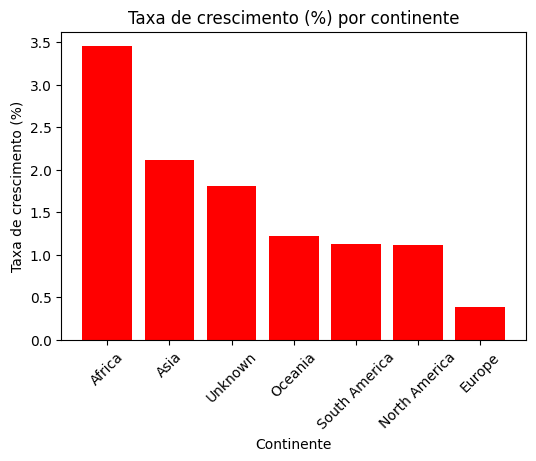

In [20]:
#Continente que apresenta a maior taxa de crescimento populacional
#Calculo de média GR por continente
mediaGRcontinent = df1.groupby('Continent')['Growth Rate (%)'].mean().sort_values(ascending=False)
mediaGRcontinent = mediaGRcontinent.apply(lambda x: round(x, 2))

plt.figure(figsize=(6, 4))
plt.bar(mediaGRcontinent.index, mediaGRcontinent, color='red')

plt.title('Taxa de crescimento (%) por continente')
plt.xlabel('Continente')
plt.ylabel('Taxa de crescimento (%)')

plt.xticks(rotation=45)
plt.show()

**Algumas conclusões**
1. A África é o continente que possui a maior taxa de crescimento populacional, ou seja, é a região onde a população mais cresceu em números absolutos.
2. A rápida mudança demográfica da África indica que suas cidades mais populosas estão passando por intensos fatores que potencializam o crescimento populacional.
3. É nítida a diferença entre continentes que possuem países e cidades em desenvolvimento (África e Ásia) com continentes desenvolvidos (Europa)

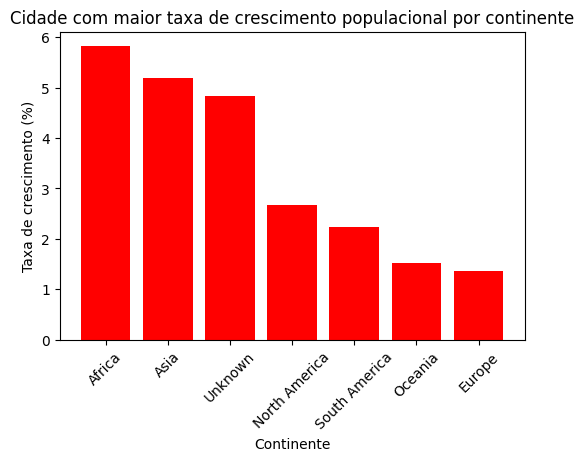

In [21]:
#Cidade que apresenta a maior taxa de crescimento populacional
maxGRcontinent = df1.groupby('Continent')['Growth Rate (%)'].max().sort_values(ascending=False)
maxGRcontinent = maxGRcontinent.apply(lambda x: round(x, 2))

plt.figure(figsize=(6, 4))
plt.bar(maxGRcontinent.index, maxGRcontinent, color='red')

plt.title('Cidade com maior taxa de crescimento populacional por continente')
plt.xlabel('Continente')
plt.ylabel('Taxa de crescimento (%)')

plt.xticks(rotation=45)
plt.show()

In [22]:
maxGR = maxGRcontinent.max()
print(maxGR)

5.82


In [23]:
maxRATE = 5.82
cidadeMaxRate = df1[df1['Growth Rate (%)'] == maxRATE]['City']
print(cidadeMaxRate)

451    Bujumbura
Name: City, dtype: object


**Conclusão**
1. A cidade com a maior taxa de crescimento populacional entre os anos 2023 e 2024 pertence ao continente que mais cresceu no mesmo período de tempo.

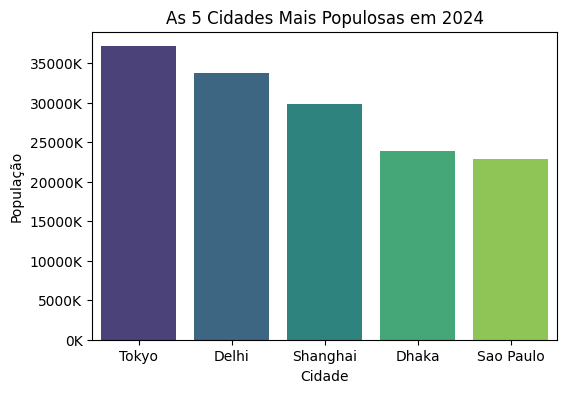

In [24]:
#as cinco cidades mais populosas (em números absolutos)
cidades_populosas = df1.sort_values(by='Population (2024)', ascending=False).head(5)

def milhoes(x, pos):
    return '%1.0fK' % (x * 1e-3)

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='City', y='Population (2024)', data=cidades_populosas, palette='viridis', hue='City', dodge=False)

ax.yaxis.set_major_formatter(FuncFormatter(milhoes))

plt.title('As 5 Cidades Mais Populosas em 2024')
plt.xlabel('Cidade')
plt.ylabel('População')
plt.xticks(rotation=0)
plt.show()

In [25]:
infoCidades_populosas = df1[df1['City'].isin(cidades_populosas['City'])]
infoCidades_populosas

,City,Country,Continent,Population (2024),Population (2023),Growth Rate,Growth Rate (%)
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021,-0.21
1,Delhi,India,Asia,33807403,32941309,0.0263,2.63
2,Shanghai,China,Asia,29867918,29210808,0.0225,2.25
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313,3.13
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083,0.83


**Algumas conclusões**
1. Das cinco cidades mais populosas do mundo em 2024, apenas Tóquio está em declínio populacional.
2. Quatro cidades pertencem a Ásia (segundo continente que mais cresceu entre 2023 e 2024).

In [27]:
#Cidades em declínio populacional
declinio_populacional = df1[df1['Growth Rate (%)'] < 0]
cidadesDP = declinio_populacional['City'].value_counts()
continentesDP = declinio_populacional['Continent'].value_counts()
print(cidadesDP)
print(continentesDP)

City
Tokyo                     1
Osaka                     1
Bucheon                   1
Saratov                   1
Indianapolis (balance)    1
Donetsk                   1
Dnipro                    1
Volgograd                 1
Odesa                     1
Samara                    1
Omsk                      1
Nizhniy Novgorod          1
Sofia                     1
Dallas                    1
San Diego                 1
Kharkiv                   1
Philadelphia              1
Bucharest                 1
Hamburg                   1
Hiroshima                 1
Daegu                     1
Sendai                    1
Beirut                    1
San Juan                  1
Chicago                   1
Sapporo                   1
Shizuoka                  1
Los Angeles               1
Fukuoka                   1
New York                  1
Nagoya                    1
Niigata                   1
Name: count, dtype: int64
Continent
Asia             17
North America     8
Europe            7
Nam

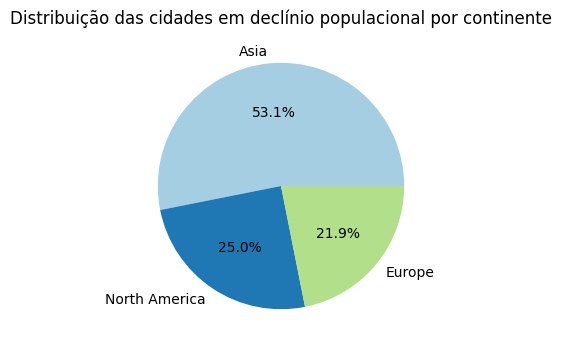

In [30]:
plt.figure(figsize=(6, 4))
plt.pie(continentesDP, labels=continentesDP.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(continentesDP))))
plt.title('Distribuição das cidades em declínio populacional por continente')
plt.show()

**Algumas conclusões**
1. Das 797 cidades mais populosas do mundo, 32 estão em declínio populacional, ou seja, apresentam um Growth Rate negativo e tiveram queda no número absoluto da população entre os anos de 2023 e 2024.
2. Mais da metade das cidades em declínio populacional pertencem a Ásia (17 cidades).
3. América do norte e Europa apresentam percentual semelhante (respectivamente 8 e 7 cidades).

In [62]:
#15 cidades com a maior taxa de declínio por continentes
qtaxas_negativas = declinio_populacional[declinio_populacional['Growth Rate (%)'] < 0]
qtaxas_negativas_sort = qtaxas_negativas.sort_values(by='Growth Rate (%)')
qtaxas_negativas_s = qtaxas_negativas_sort.head(15)
print(qtaxas_negativas_s)
continenteTN = qtaxas_negativas_s['Continent'].value_counts()
print('______________________________________________________')
continenteTN

                       City        Country      Continent  Population (2024)  \
48                 New York  United States  North America            7931147   
199                 Chicago  United States  North America            2590002   
355            Philadelphia  United States  North America            1533916   
129             Los Angeles  United States  North America            3748640   
215                  Beirut        Lebanon           Asia            2402485   
679                 Donetsk        Ukraine         Europe             882209   
640                  Dnipro        Ukraine         Europe             936766   
299               Bucharest        Romania         Europe            1767520   
683  Indianapolis (balance)  United States  North America             874089   
747                 Niigata          Japan           Asia             795916   
9                     Osaka          Japan           Asia           18967459   
252               Hiroshima          Jap

Continent
North America    6
Asia             6
Europe           3
Name: count, dtype: int64

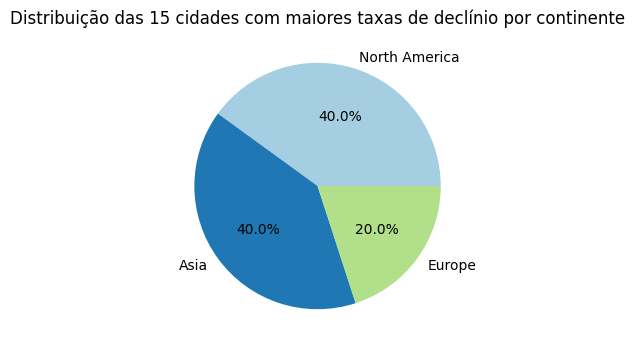

In [63]:
plt.figure(figsize=(6, 4))
plt.pie(continenteTN, labels=continenteTN.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(continenteTN))))
plt.title('Distribuição das 15 cidades com maiores taxas de declínio por continente')
plt.show()

**Conclusão**
1. Das 15 maiores taxas de declínio, 80% estão na Europa e Ásia.

In [40]:
#Comparativo
totalCidades_aumento_populacional = df1[df1['Growth Rate (%)'] > 0]
continentesTCAP = totalCidades_aumento_populacional['Continent'].value_counts()

#cidades com taxa superior a 2.5%
aumento_populacional = df1[df1['Growth Rate (%)'] > 2.5]
continentesAP = aumento_populacional['Continent'].value_counts()
print(continentesTCAP)
print(continentesAP)

Continent
Asia             481
Africa           106
South America     62
North America     54
Europe            43
Unknown           11
Oceania            6
Name: count, dtype: int64
Continent
Asia             158
Africa            81
Unknown            4
North America      3
Name: count, dtype: int64


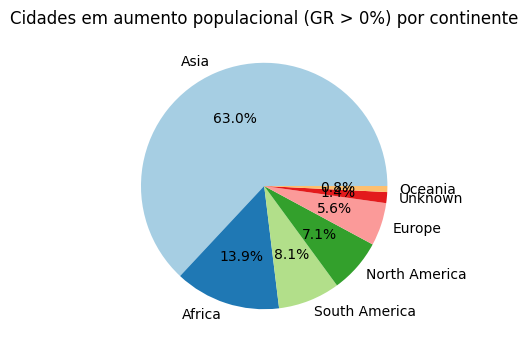

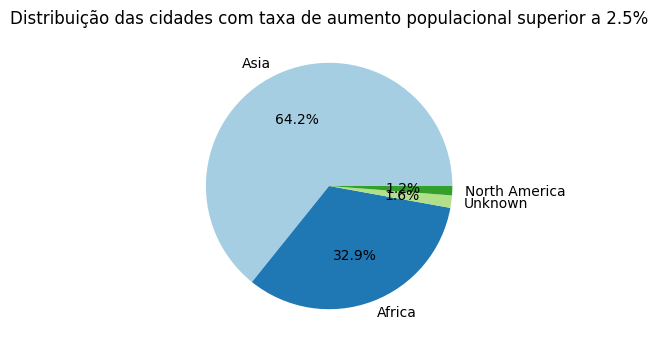

In [64]:
plt.figure(figsize=(6, 4))
plt.pie(continentesTCAP, labels=continentesTCAP.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(continentesTCAP))))
plt.title('Cidades em aumento populacional (GR > 0%) por continente')
plt.show()

plt.figure(figsize=(6, 4))
plt.pie(continentesAP, labels=continentesAP.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(continentesAP))))
plt.title('Distribuição das cidades com taxa de aumento populacional superior a 2.5%')
plt.show()

**Algumas conclusões**
1. Das cidades em aumento populacional, 63% estão no continente asiático.
2. Das cidades que possuem uma taxa de aumento populacional superior a 2,5%, 64,2% estão na Ásia. Contudo, é possível observar uma dualidade no continente, já que as cidades asiáticas também são maioria entre as que estão em declínio populacional.
3. A África possui um percentual expressivo de cidades com taxa de aumento populacional superior a 2,5%.

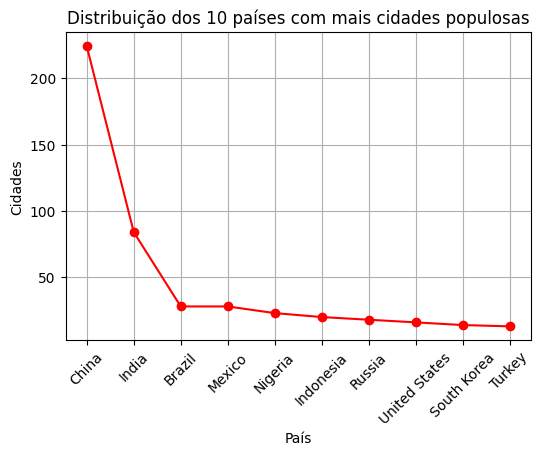

In [68]:
#Países que possuem as cidades mais populosas do mundo
cidades_populosas_por_pais = df1['Country'].value_counts()
cidades_populosas_por_pais
ccidades_populosas_por_pais = cidades_populosas_por_pais.head(10)

plt.figure(figsize=(6, 4))
plt.plot(ccidades_populosas_por_pais.index, ccidades_populosas_por_pais.values, marker='o', linestyle='-', color='red')
plt.title('Distribuição dos 10 países com mais cidades populosas')
plt.xlabel('País')
plt.ylabel('Cidades')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Algumas conclusões**
1. Dentre as cidades mais populosas do mundo, 224 estão na china.
2. A Índia possui 84 cidades, 140 a menos do que a China, indicando uma tendência de crescimento populacional mais abrangente no território chinês.


---
# FONTES
Documentação das bibliotecas:
1. Numpy
2. Pandas
3. Matplotlib
4. Seaborn

---

Dataset kaggle: https://www.kaggle.com/datasets/dataanalyst001/world-population-growth-rate-by-cities-2024?resource=download

